In [1]:
# Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

file_to_load_merge = "population_lat_lon.csv"

merge_data_df = pd.read_csv(file_to_load_merge)

In [2]:
merge_data_df = merge_data_df.sort_values("Ave. Change", ascending=False)
top_5=merge_data_df.nlargest(5, 'Ave. Change')
merge_data_df = merge_data_df.sort_values("Ave. Change", ascending=True)
bottom_5=merge_data_df.nsmallest(5, 'Ave. Change')

# Cleaning Ave Income Data
* Set up dataframe to create graphs

In [3]:
#top 5
city_t = top_5.iloc[:,2].str.rstrip()
state = top_5.iloc[:,3]
city_state = city_t + ", " + state
y2010 = top_5.iloc[:,26]
y2011 = top_5.iloc[:,27]
y2012 = top_5.iloc[:,28]
y2013 = top_5.iloc[:,29]
y2014 = top_5.iloc[:,30]
y2015= top_5.iloc[:,31]
y2016 = top_5.iloc[:,32]
y2017 = top_5.iloc[:,33]
diff_t = y2017 - y2010
ave_income_state = pd.DataFrame({"City":city_state, "2010":y2010,"2011":y2011,"2012":y2012,"2013":y2013,"2014":y2014,"2015":y2015,
                                "2016":y2016,"2017":y2017, "Diff" : diff_t})
ave_income_state = ave_income_state.set_index("City")
ave_income_state_1 = ave_income_state.drop("Diff",axis=1)
ave_income_state.sort_values("Diff", ascending=False)

,2010,2011,2012,2013,2014,2015,2016,2017,Diff
City,,,,,,,,,
"Frisco, Texas",103533,105647,108428,108284,112155,114098,117642,120701,17168
"Midland, Texas",48843,50203,50497,50928,50433,53722,54612,58910,10067
"McKinney, Texas",78256,80855,81894,81118,82988,81459,83257,87608,9352
"Irvine, California",90939,92599,92663,90585,91999,92278,93823,95573,4634
"Murfreesboro, Tennessee",32500,30556,30391,29946,28333,26724,26932,32250,-250


In [4]:
#bottom 5
city_b = bottom_5.iloc[:,2].str.rstrip()
state_b = bottom_5.iloc[:,3]
city_state_b = city_b.str.rstrip() + ", " + state_b
y2010_b = bottom_5.iloc[:,26]
y2011_b = bottom_5.iloc[:,27]
y2012_b = bottom_5.iloc[:,28]
y2013_b = bottom_5.iloc[:,29]
y2014_b = bottom_5.iloc[:,30]
y2015_b = bottom_5.iloc[:,31]
y2016_b = bottom_5.iloc[:,32]
y2017_b = bottom_5.iloc[:,33]
diff = y2017_b - y2010_b
ave_income_state_b = pd.DataFrame({"City":city_state_b, "2010":y2010_b,"2011":y2011_b,"2012":y2012_b,
                                 "2013":y2013_b,"2014":y2014_b,"2015":y2015_b,"2016":y2016_b,"2017":y2017_b, "Diff": diff})
ave_income_state_b = ave_income_state_b.set_index("City")
ave_income_state_b.sort_values("Diff", ascending=False)
ave_income_state_b1 = ave_income_state_b.drop("Diff",axis=1)
years = ave_income_state_b1.iloc[0,:]
years = years.index
ave_income_state_b.sort_values("Diff", ascending=False)

,2010,2011,2012,2013,2014,2015,2016,2017,Diff
City,,,,,,,,,
"Erie, Pennsylvania",38796,38047,36905,42386,40313,39519,39191,43929,5133
"Shreveport, Louisiana",35613,36803,38465,38633,38413,38583,38056,37390,1777
"Detroit, Michigan",28357,27862,26955,26325,26095,25764,26249,27838,-519
"Flint, Michigan",27199,26621,26339,24834,24679,24862,25650,26330,-869
"Jackson, Mississippi",32917,31063,37083,34750,29764,31232,31096,30694,-2223


# Use matplotlib to graph the data from dataframes

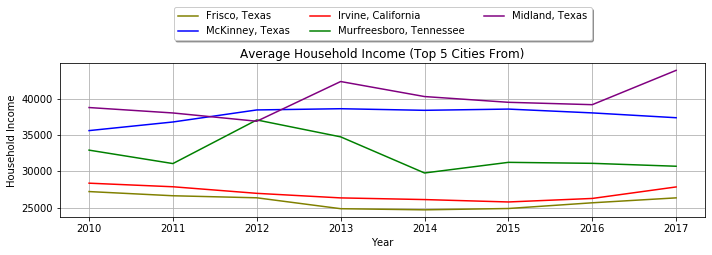

In [5]:
#size
plt.subplots(figsize=(10,4))
plt.plot( years, ave_income_state_b1.iloc[0,:], color='olive',label="Frisco, Texas")
plt.plot( years, ave_income_state_b1.iloc[1,:], color='blue',label="McKinney, Texas")
plt.plot( years, ave_income_state_b1.iloc[2,:], color='red',label="Irvine, California")
plt.plot( years, ave_income_state_b1.iloc[3,:], color='green',label="Murfreesboro, Tennessee")
plt.plot( years, ave_income_state_b1.iloc[4,:], color='purple',label="Midland, Texas")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3, fancybox=True, shadow=True)
plt.title("Average Household Income (Top 5 Cities From)")
plt.xlabel("Year")
plt.ylabel("Household Income")
plt.grid()
plt.tight_layout()
plt.savefig('bottom_5_line.png',dpi=200)

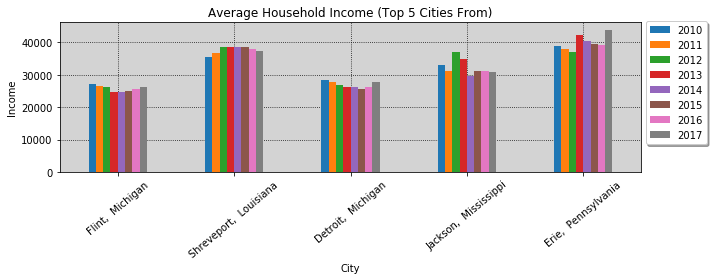

In [6]:
newws = ave_income_state_b1.plot.bar(rot=40,figsize=(10,4),zorder=2)
newws.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.04), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Income")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title("Average Household Income (Top 5 Cities From)")
plt.tight_layout()
plt.savefig('bottom_5_bar.png',dpi=200)
plt.show()

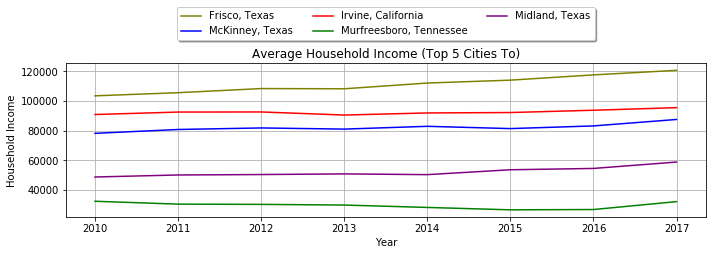

In [7]:
plt.subplots(figsize=(10,4))
plt.plot( years, ave_income_state_1.iloc[0,:], color='olive',label="Frisco, Texas")
plt.plot( years, ave_income_state_1.iloc[1,:], color='blue',label="McKinney, Texas")
plt.plot( years, ave_income_state_1.iloc[2,:], color='red',label="Irvine, California")
plt.plot( years, ave_income_state_1.iloc[3,:], color='green',label="Murfreesboro, Tennessee")
plt.plot( years, ave_income_state_1.iloc[4,:], color='purple',label="Midland, Texas")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3, fancybox=True, shadow=True)
plt.title("Average Household Income (Top 5 Cities To)")
plt.xlabel("Year")
plt.ylabel("Household Income")
plt.grid()
plt.tight_layout()
plt.savefig('top_5_line.png',dpi=200)

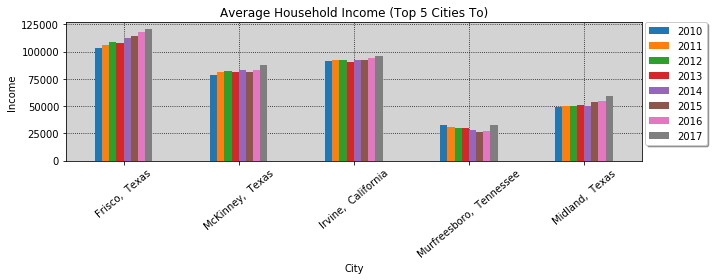

In [8]:
neww = ave_income_state_1.plot.bar(rot=40,figsize=(10,4),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.04), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Income")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title("Average Household Income (Top 5 Cities To)")
plt.tight_layout()
plt.savefig('top_5_bar.png',dpi=200)
plt.show()

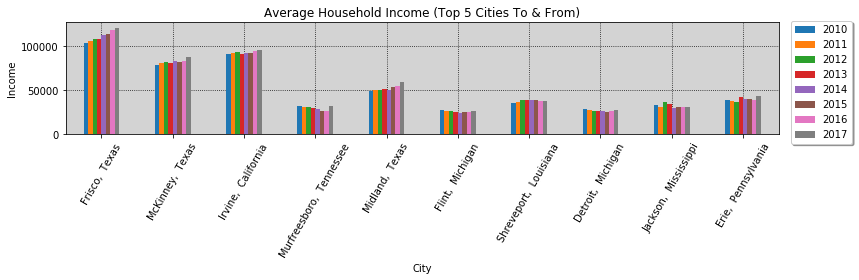

In [9]:
new = pd.concat([ave_income_state_1, ave_income_state_b1])
news=new.plot.bar(rot=60,figsize=(12,4),zorder=2)
news.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.06), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Income")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title("Average Household Income (Top 5 Cities To & From)")
plt.tight_layout()
plt.savefig('top_and_bottom_5_bar.png',dpi=200)
plt.show()

# Cleaning Zillow data
* Need to parse through the data to set up dataframe.

In [10]:
file_to_load_housing = "City_Zhvi_AllHomes.csv"
import numpy as np
housing_df = pd.read_csv(file_to_load_housing,encoding='iso-8859-1')


csvpath = os.path.join("City_Zhvi_AllHomes.csv")

top_housing = []
bottom_housing = []
t10 = []
t11 = []
t12 = []
t13 = []
t14 = []
t15 = []
t16 = []
t17 = []

b10 = []
b11 = []
b12 = []
b13 = []
b14 = []
b15 = []
b16 = []
b17 = []

In [11]:
with open(csvpath, newline="") as csvfile:
    csvreader = csv.reader(csvfile, delimiter=",")
    city_t = pd.DataFrame(city_t)
    city_b = pd.DataFrame(city_b)
    # Loop through looking for the video
    for row in csvreader:
        
        if row[1] in city_t.values:
            if row[2]=="TX":
                top_housing.append(f'{row[1]}, {row[2]}')
                t10.append(int(row[173]))
                t11.append(int(row[185]))
                t12.append(int(row[197]))
                t13.append(int(row[209]))
                t14.append(int(row[221]))
                t15.append(int(row[233]))
                t16.append(int(row[245]))
                t17.append(int(row[257]))
            elif row[2]=="CA":
                top_housing.append(f'{row[1]}, {row[2]}')
                t10.append(int(row[173]))
                t11.append(int(row[185]))
                t12.append(int(row[197]))
                t13.append(int(row[209]))
                t14.append(int(row[221]))
                t15.append(int(row[233]))
                t16.append(int(row[245]))
                t17.append(int(row[257]))
            elif row[2]=="TN":
                top_housing.append(f'{row[1]}, {row[2]}')
                t10.append(int(row[173]))
                t11.append(int(row[185]))
                t12.append(int(row[197]))
                t13.append(int(row[209]))
                t14.append(int(row[221]))
                t15.append(int(row[233]))
                t16.append(int(row[245]))
                t17.append(int(row[257]))
        
        if row[1] in city_b.values:
            if row[2]=="MI":
                if row[1]!= "Jackson":
                    bottom_housing.append(f'{row[1]}, {row[2]}')
                    b10.append(int(row[173]))
                    b11.append(int(row[185]))
                    b12.append(int(row[197]))
                    b13.append(int(row[209]))
                    b14.append(int(row[221]))
                    b15.append(int(row[233]))
                    b16.append(int(row[245]))
                    b17.append(int(row[257]))
            elif row[2]=="LA":
                if row[1]!= "Jackson":
                    bottom_housing.append(f'{row[1]}, {row[2]}')
                    b10.append(int(row[173]))
                    b11.append(int(row[185]))
                    b12.append(int(row[197]))
                    b13.append(int(row[209]))
                    b14.append(int(row[221]))
                    b15.append(int(row[233]))
                    b16.append(int(row[245]))
                    b17.append(int(row[257]))
            elif row[2]=="MS":
                bottom_housing.append(f'{row[1]}, {row[2]}')
                b10.append(int(row[173]))
                b11.append(int(row[185]))
                b12.append(int(row[197]))
                b13.append(int(row[209]))
                b14.append(int(row[221]))
                b15.append(int(row[233]))
                b16.append(int(row[245]))
                b17.append(int(row[257]))
            elif row[2]=="PA":
                bottom_housing.append(f'{row[1]}, {row[2]}')
                b10.append(int(row[173]))
                b11.append(int(row[185]))
                b12.append(int(row[197]))
                b13.append(int(row[209]))
                b14.append(int(row[221]))
                b15.append(int(row[233]))
                b16.append(int(row[245]))
                b17.append(int(row[257]))

In [12]:
housing_top_df = pd.DataFrame({"City":top_housing, "2010":t10,"2011":t11,"2012":t12,"2013":t13,"2014":t14,"2015":t15,
                                "2016":t16,"2017":t17,})
housing_top_df = housing_top_df.set_index("City")
diff_housing_t = housing_top_df.iloc[:,7]-housing_top_df.iloc[:,0]
housing_top_df["Diff"] = diff_housing_t
housing_top_df1 = housing_top_df.drop("Diff",axis=1)

housing_bottom_df = pd.DataFrame({"City":bottom_housing, "2010":b10,"2011":b11,"2012":b12,"2013":b13,"2014":b14,"2015":b15,
                                "2016":b16,"2017":b17,})
housing_bottom_df = housing_bottom_df.set_index("City")
diff_housing_b = housing_bottom_df.iloc[:,7]-housing_bottom_df.iloc[:,0]
housing_bottom_df["Diff"] = diff_housing_b
housing_bottom_df1 = housing_bottom_df.drop("Diff",axis=1)

years = ave_income_state_b1.iloc[0,:]
years = years.index

# Use matplotlib to graph the data from dataframes

,2010,2011,2012,2013,2014,2015,2016,2017,Diff
City,,,,,,,,,
"Irvine, CA",621749,600014,574472,659884,750766,753627,791060,819043,197294
"Frisco, TX",270251,263260,267978,285308,313785,347033,381119,402419,132168
"McKinney, TX",204005,198381,199827,214660,239214,265338,292576,312769,108764
"Murfreesboro, TN",168326,162369,158833,164884,170854,179760,201545,224085,55759
"Midland, TX",160993,161567,174382,192069,210953,220328,207057,211113,50120


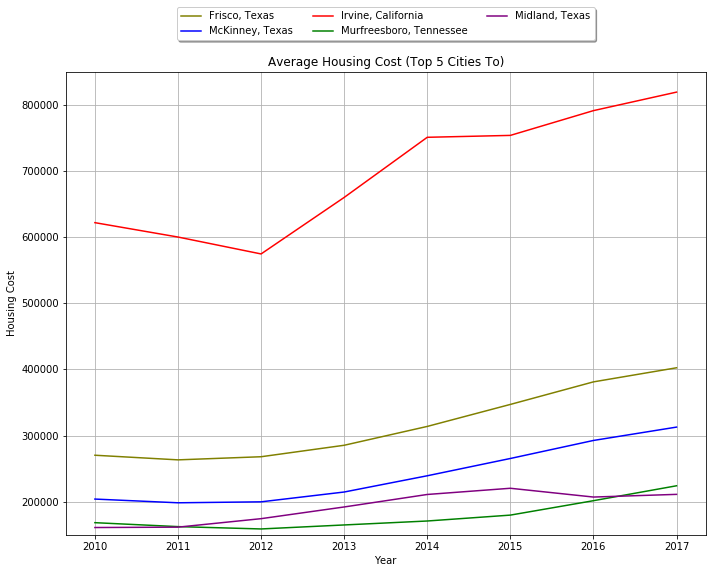

In [13]:
plt.subplots(figsize=(10,8))
plt.ylim(150000,850000)
plt.plot( years, housing_top_df1.iloc[4,:], color='olive',label="Frisco, Texas")
plt.plot( years, housing_top_df1.iloc[2,:], color='blue',label="McKinney, Texas")
plt.plot( years, housing_top_df1.iloc[0,:], color='red',label="Irvine, California")
plt.plot( years, housing_top_df1.iloc[1,:], color='green',label="Murfreesboro, Tennessee")
plt.plot( years, housing_top_df1.iloc[3,:], color='purple',label="Midland, Texas")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)
plt.title("Average Housing Cost (Top 5 Cities To)")
plt.xlabel("Year")
plt.ylabel("Housing Cost")
plt.grid()
plt.tight_layout()
plt.savefig('top_5_housing.png',dpi=200)
housing_top_df.sort_values("Diff", ascending=False)

,2010,2011,2012,2013,2014,2015,2016,2017,Diff
City,,,,,,,,,
"Detroit, MI",17732,16453,13812,14571,17168,20646,22027,25157,7425
"Flint, MI",22505,18175,17821,17257,16411,17917,17872,19593,-2912
"Erie, PA",85333,82862,82036,82203,81971,81398,80866,81850,-3483
"Shreveport, LA",107876,107348,109118,106236,105499,99232,100031,104178,-3698
"Jackson, MS",50546,50287,37832,37206,34822,41966,43438,44409,-6137


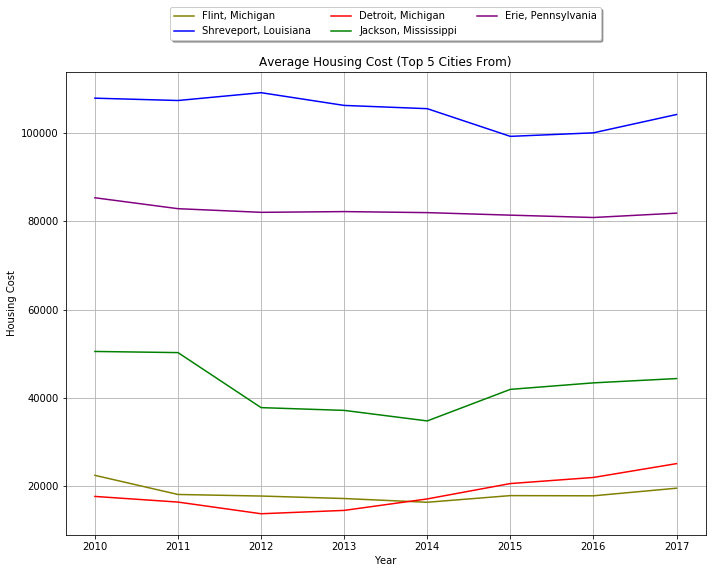

In [14]:
plt.subplots(figsize=(10,8))

plt.plot( years, housing_bottom_df1.iloc[3,:], color='olive',label="Flint, Michigan")
plt.plot( years, housing_bottom_df1.iloc[1,:], color='blue',label="Shreveport, Louisiana")
plt.plot( years, housing_bottom_df1.iloc[0,:], color='red',label="Detroit, Michigan")
plt.plot( years, housing_bottom_df1.iloc[2,:], color='green',label="Jackson, Mississippi")
plt.plot( years, housing_bottom_df1.iloc[4,:], color='purple',label="Erie, Pennsylvania")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=True)
plt.title("Average Housing Cost (Top 5 Cities From)")
plt.xlabel("Year")
plt.ylabel("Housing Cost")
plt.grid()
plt.tight_layout()
plt.savefig('bottom_5_housing.png',dpi=200)
housing_bottom_df.sort_values("Diff", ascending=False)

In [17]:
housing_diff_total = {**diff_housing_t, **diff_housing_b}
ave_diff_total = {**ave_income_state["Diff"], **ave_income_state_b["Diff"]}

diff_df = pd.DataFrame({"Housing":housing_diff_total})
diff_df1 = pd.DataFrame({"Income":ave_diff_total})
result = pd.merge(diff_df, diff_df1, on=diff_df1.index)
result.rename(columns = {'key_0':'City'}, inplace = True) 
result = result.set_index("City")
result.sort_values("Income", ascending=False)

,Housing,Income
City,,
"Frisco, Texas",132168,17168
"Midland, Texas",50120,10067
"McKinney, Texas",108764,9352
"Erie, Pennsylvania",-3483,5133
"Irvine, California",197294,4634
"Shreveport, Louisiana",-3698,1777
"Murfreesboro, Tennessee",55759,-250
"Detroit, Michigan",7425,-519
"Flint, Michigan",-2912,-869


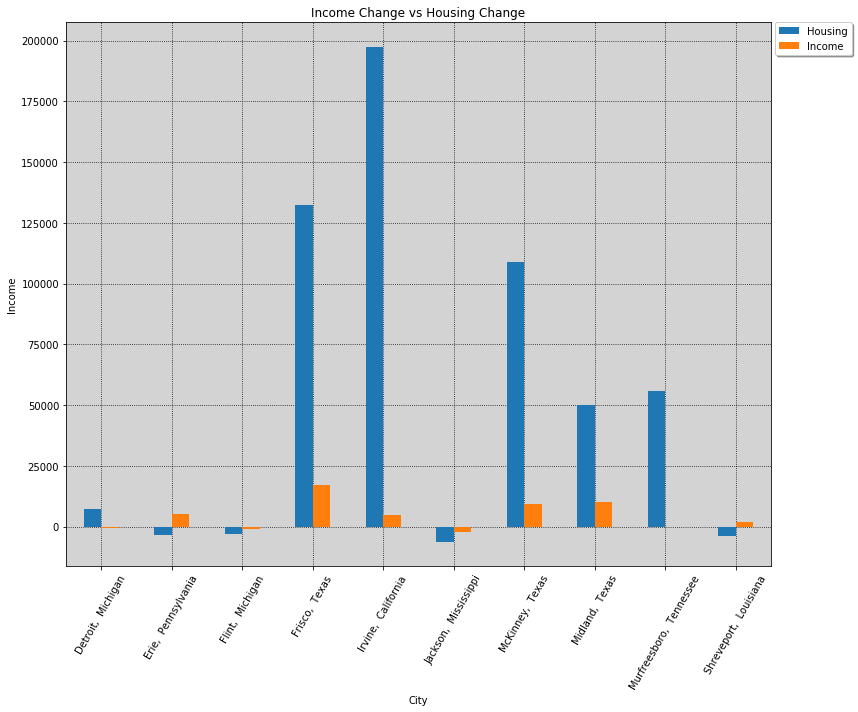

In [16]:
neww = result.plot.bar(rot=60,figsize=(12,10),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.01), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Income")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title("Income Change vs Housing Change")
plt.tight_layout()
plt.savefig('difference.png',dpi=200)
plt.show()

### Based on the data collected for those factors, we are able determine there is a correlation between housing costs and population shifts. At the same time there doesn't seem to be any correlation with average household income and population shifts.